In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfTitanictrain = pd.read_csv("E:\\Estudos\DataScience-MachineLearning\\kaggle - bases de dados\\titanic\\Titanic_train.csv")
dfTitanictrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


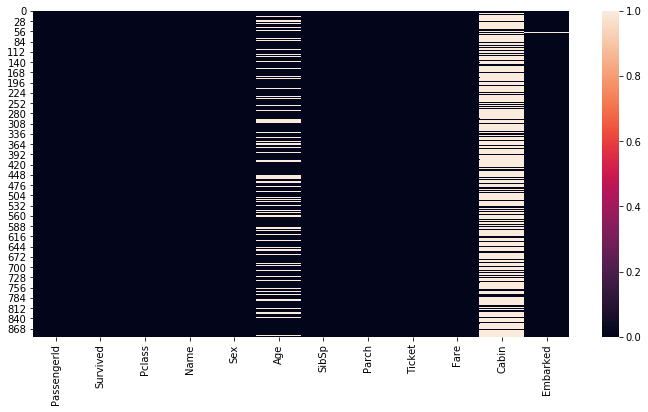

In [3]:
#ANALISE EXPLORATORIA DO DATASET

#datos não preenchidos/nulos
plt.figure(figsize=(12,6))
sns.heatmap(dfTitanictrain.isnull())

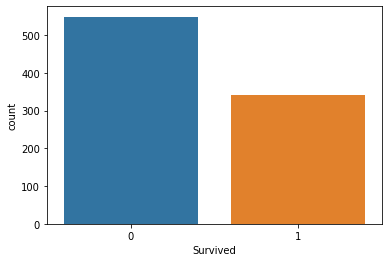

In [4]:
#ANALISE EXPLORATORIA DO DATASET

#Sobreviventes
sns.countplot(x="Survived", data=dfTitanictrain)

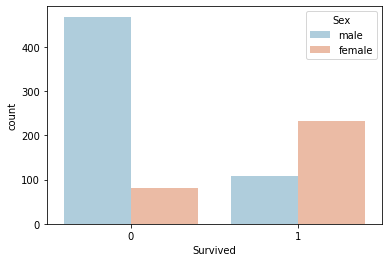

In [5]:
#ANALISE EXPLORATORIA DO DATASET

#Sobreviventes por sexo
sns.countplot(x="Survived", hue="Sex", data=dfTitanictrain, palette='RdBu_r')

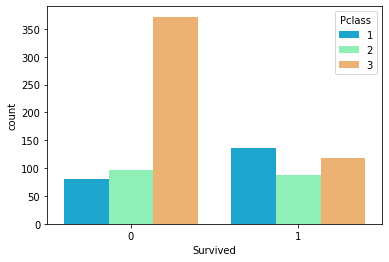

In [6]:
#ANALISE EXPLORATORIA DO DATASET

#Sobreviventes por Classe (primeira, segunda e terceira)
sns.countplot(x='Survived', hue='Pclass', data=dfTitanictrain, palette='rainbow')

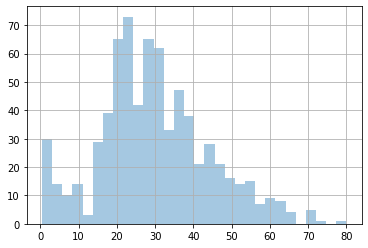

In [7]:
#ANALISE EXPLORATORIA DO DATASET

#Idade das pessoas no navio

dfTitanictrain['Age'].hist(bins=30, alpha=0.4)

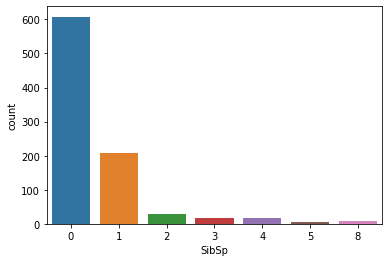

In [8]:
#ANALISE EXPLORATORIA DO DATASET

#Passageiros acompanhados

sns.countplot(x='SibSp', data=dfTitanictrain)

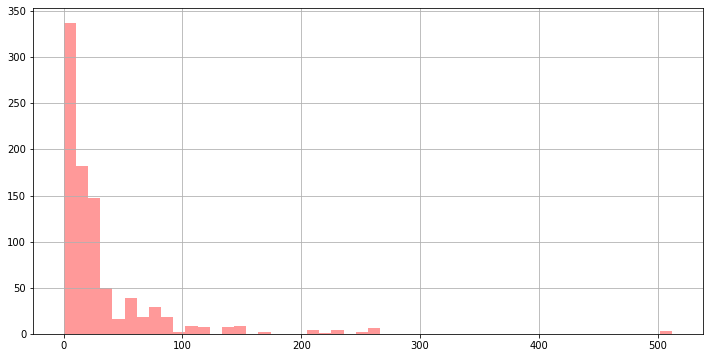

In [9]:
#ANALISE EXPLORATORIA DO DATASET

#Preço da viagem

dfTitanictrain['Fare'].hist(bins=50, alpha=0.4, figsize=(12,6), color='red')

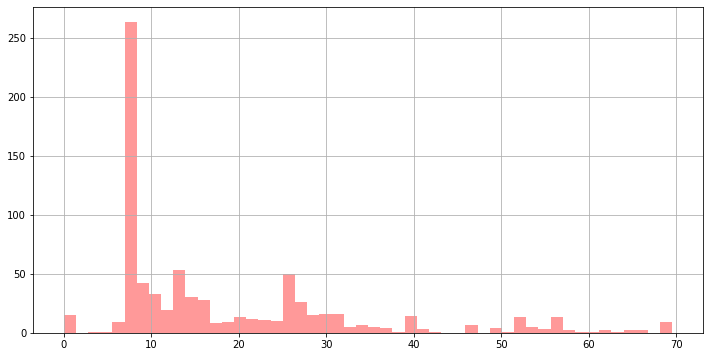

In [10]:
#ANALISE EXPLORATORIA DO DATASET

#Preço da viagem menor que 70 $

dfTitanictrain[dfTitanictrain['Fare']<70]['Fare'].hist(bins=50, alpha=0.4, figsize=(12,6), color='red')

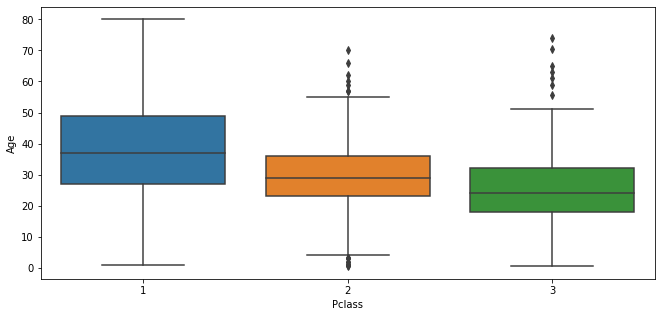

In [11]:
plt.figure(figsize=(11,5))
sns.boxplot(x='Pclass', y='Age', data= dfTitanictrain)

In [12]:
#Tratando dados: Idade/Age

#Nesse arquivo do titanic existe um grande quantidade de valores nulos
#Idade/Age é um deles
#Nesse caso escolhemos preecher as idades faltantes pela media por classe assim como observamos no grafico acima 


In [13]:
#função para inserir a idade por media da classe de passageiros

def inputAge(cols):
    Age = cols[0]
    Class = cols[1]
    
    if pd.isnull(Age):
        if Class == 1:
            return 37
        elif Class == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
#Aplicando a função
dfTitanictrain['Age'] = dfTitanictrain[['Age','Pclass']].apply(inputAge, axis = 1)

In [15]:
dfTitanictrain["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [16]:
#Confira no grafico heatmap acima para ser que os dados de idade foram preenchidos 

In [17]:
#Tratando Dados: Cabin
#Em caso de muitos dados nulos em que o preechimento dele seria um valor em forma de string, do qual não é possível prever
#a origem desses dados e nem obter uma média (já que são valores de string), a melhor solução é apagar esses dados
#TODA A COLUNA

In [18]:
#duas formas de apagar os dados de forma definitiva 

del dfTitanictrain['Cabin']

#ou
# dfTitanictrain.drop('Cabin', inplace = True)

In [19]:
#Confira no grafico heatmap acima para ser que os dados de idade foram preenchidos 

In [20]:
#Tratando Dados: Embarked
#Nesse caso temos apenas um dado faltante, nulo.
#Um único dado é muito pouco para interferir no  resultado final, então, iremos apagar essa linha tbm

In [21]:
#O metodo dropna apaga valores nulos em todo data frame
#a exclusão pode ser feita no eixo 1 ou 0
#por padrão dropna apaga no eixo zero (apenas a linha)
#caso informe o eixo 1, dropna apara a coluna inteira

dfTitanictrain.dropna(inplace = True)

In [22]:
#Confira no grafico heatmap acima para ser que os dados de idade foram preenchidos 

In [23]:
dfTitanictrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [24]:
#Tratando dados:
#Alguns dados em forma de string é possivel converter em dados numericos 
#Nesse caso podemos definir Sexo como 0 e 1, onde 0 é o sexo feminino e 1 é o masculino

#Tbm é possível classificar o embarque dessa forma
#Apesar de embarque ter 3 categorias, ao realizar a conversão (em dois valores 0 e 1), o terceiro valor pode ser 
#deduzido, uma vez que temos 2 opções.
#Se o passageiro não embarcou na estação 0 ou na 1, com certeza embarcou nessa terceira opção dedutivel

In [25]:
#a função do pandas get_dummies faz essa classificação de  converter a string em um numero lógico

sex = pd.get_dummies(dfTitanictrain['Sex'], drop_first = True)

In [26]:
embark = pd.get_dummies(dfTitanictrain['Embarked'], drop_first = True)

In [27]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [28]:
#Tratando Dados:
#Para esse modelo, dados/colunas em string que não é possivel converter para um dado númerico, iremos apagar
    #Colunas: Nome do passageiro, Ticket
#Outros dados que não fazem sentido para o modelo
    #Passengerid
#Substituir Sex e Embarked pelos get_dummies que obtemos acima

In [29]:
#Apagando os dados
dfTitanictrain.drop(['Sex', 'PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [30]:
dfTitanictrain

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S
887,1,1,19.0,0,0,30.0000,S
888,0,3,24.0,1,2,23.4500,S
889,1,1,26.0,0,0,30.0000,C


In [31]:
#Agragando dos dados dos get_dummies que fizemos

dfTitanictrain = pd.concat([dfTitanictrain, sex, embark], axis = 1)

In [32]:
dfTitanictrain

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,1,0,1
887,1,1,19.0,0,0,30.0000,S,0,0,1
888,0,3,24.0,1,2,23.4500,S,0,0,1
889,1,1,26.0,0,0,30.0000,C,1,0,0


In [33]:
#Esquecemos de apagar a coluna Embarked que tbm é uma string

dfTitanictrain.drop(['Embarked'], axis = 1, inplace = True)

In [35]:
#TREINANDO O MODELO PARA DIZER SE O PASSAGEIRO MORREU OU SOBREVIVEU

#importando bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [38]:
#TREINANDO O MODELO PARA DIZER SE O PASSAGEIRO MORREU OU SOBREVIVEU

#trainando o modelo
xTrain, xTest, yTrain, yTest = train_test_split(dfTitanictrain.drop('Survived', axis = 1), dfTitanictrain['Survived'],test_size = 0.3)

#nessa linha estamos declarando que:
    #vamos deletrar a coluna Survived temporariamente do DataFrame para usar depois comparar se o modelo acertou a predição
    #informar qual qual dados queremos predizer (Survived)
    #Porcentagem para o analise do apredizado

In [40]:
#TREINANDO O MODELO PARA DIZER SE O PASSAGEIRO MORREU OU SOBREVIVEU

#estanciando objeto da classe Logistic Regression
logModel = LogisticRegression()

In [43]:
#TREINANDO O MODELO PARA DIZER SE O PASSAGEIRO MORREU OU SOBREVIVEU

#calibranco modelo
logModel.fit(xTrain, yTrain)

C:\Users\WOSH\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
#TREINANDO O MODELO PARA DIZER SE O PASSAGEIRO MORREU OU SOBREVIVEU

#prevendo
predictions = logModel.predict(xTest)

In [45]:
#TREINANDO O MODELO PARA DIZER SE O PASSAGEIRO MORREU OU SOBREVIVEU

#Classficando modelo: errou ou acertou a predição

#importando 
from sklearn.metrics import classification_report

In [46]:
#TREINANDO O MODELO PARA DIZER SE O PASSAGEIRO MORREU OU SOBREVIVEU

#Classficando modelo: errou ou acertou a predição

#Relatorio
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       174
           1       0.74      0.69      0.72        93

    accuracy                           0.81       267
   macro avg       0.79      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267



In [47]:
#TREINANDO O MODELO PARA DIZER SE O PASSAGEIRO MORREU OU SOBREVIVEU

#Relatorio
    #Esse modelo acertou que o passageiro morreu em 84% dos casos
    #Acertou em 74% quando o passageiro sobreviveu
    #Como nesse modelo nós não levamos em consideração nada que não pudesse ser converdito em numero, podemos dizer que
    #foi uma boa porcetagem de acertos. Caso tivessemos levado em consideração o Titulo da Pessoa (Dr dado a frente do nome)
    #Talvez poderiamos ter uma resporta mais precisa (talvez).

In [49]:
#Matriz de confusão do modelo

from sklearn.metrics import confusion_matrix

print(confusion_matrix(yTest, predictions))

[[152  22]
 [ 29  64]]
